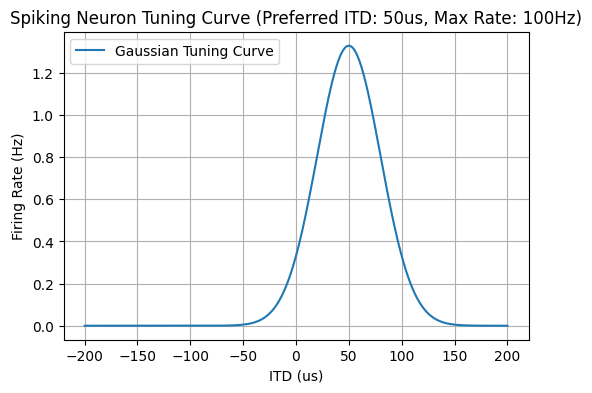

In [1]:
# plot a Gaussian tuning curve for one neuron

import numpy as np
import matplotlib.pyplot as plt

#parameters
preferred_itd = 50  # us
sigma = 30          # us (width of the tuning curve)
max_rate = 100       # Hz (maximum firing rate)

# Generate a grid space of ITD values for plotting
itd_space = np.linspace(-200.0, 200.0, 401) # ITD values from -1.0ms to 1.0ms

# Calculate the tuning curve
from neurostatsmodels.populations import gaussian
tuning_curve_rates = gaussian(itd_space, preferred_itd, sigma) * max_rate

# Plot the tuning curve
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(itd_space, tuning_curve_rates, label='Gaussian Tuning Curve')
plt.xlabel('ITD (us)')
plt.ylabel('Firing Rate (Hz)')
plt.title(f'Spiking Neuron Tuning Curve (Preferred ITD: {preferred_itd}us, Max Rate: {max_rate}Hz)')
plt.grid(True)
plt.legend()
plt.show()

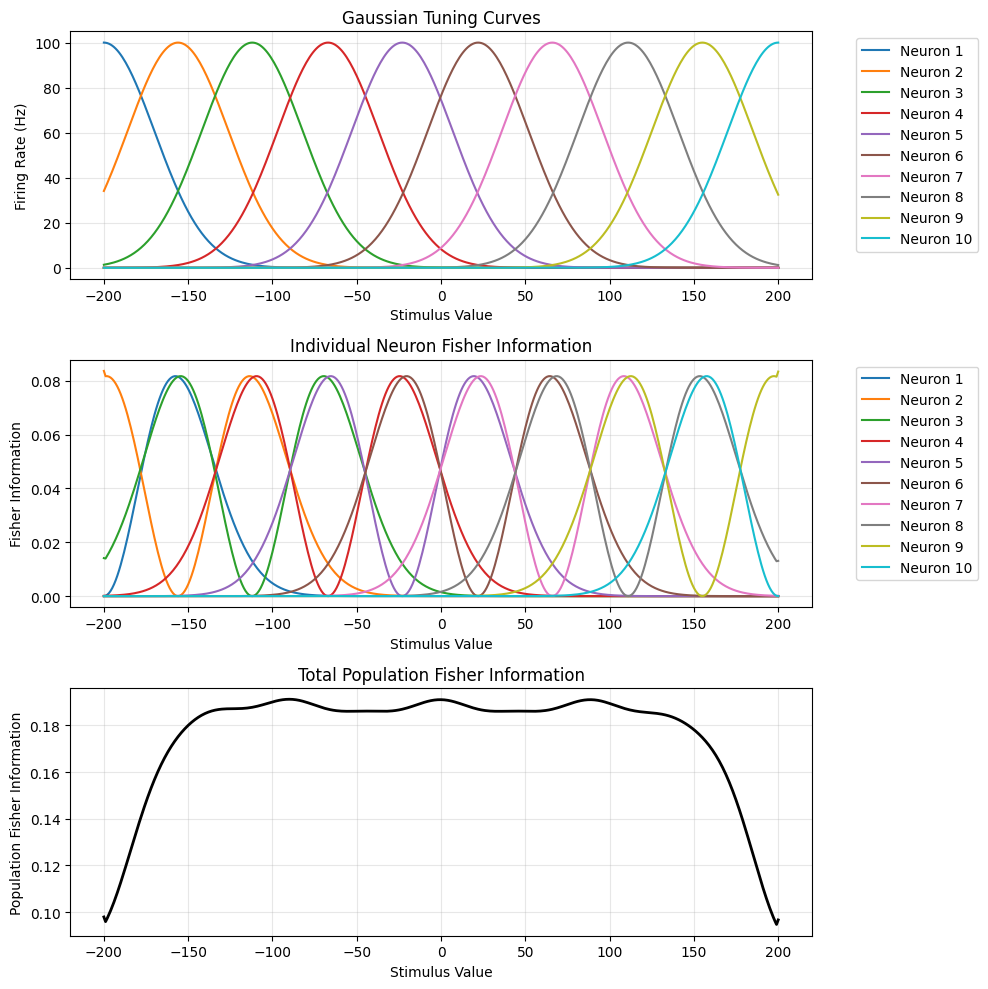

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from neurostatsmodels.populations import GaussianTunedPopulation

# Create population
n_neurons = 10
pop = GaussianTunedPopulation(n_neurons=n_neurons, max_rate=100.0)

# Set up stimulus grid
stimulus_grid = np.linspace(-200, 200, 401)

# Configure population
pop.set_means_uniform(stimulus_grid)
pop.set_sigmas(20.0)

# Build curves on the grid
pop.build_tuning_curves(stimulus_grid)
pop.build_fisher_info_curves(epsilon=1e-10)

# Now query at specific points (works for single values!)
single_stimulus = 50.0
single_rates = pop.get_rates_at(single_stimulus)
single_fi = pop.get_population_fisher_info_at(single_stimulus)

print(f"At stimulus = {single_stimulus}:")
print(f"Rates: {single_rates}")
print(f"Population FI: {single_fi:.4f}")

# Plot using stored curves
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Tuning curves
for i in range(n_neurons):
    axes[0].plot(stimulus_grid, pop.tuning_curves[i, :])
axes[0].set_xlabel("Stimulus Value")
axes[0].set_ylabel("Firing Rate (Hz)")
axes[0].set_title("Tuning Curves")

# Individual FI
for i in range(n_neurons):
    axes[1].plot(stimulus_grid, pop.fisher_info_curves[i, :])
axes[1].set_xlabel("Stimulus Value")
axes[1].set_ylabel("Fisher Information")
axes[1].set_title("Individual Fisher Information")

# Population FI
pop_fi_curve = np.sum(pop.fisher_info_curves, axis=0)
axes[2].plot(stimulus_grid, pop_fi_curve, "k", linewidth=2)
axes[2].set_xlabel("Stimulus Value")
axes[2].set_ylabel("Population Fisher Information")
axes[2].set_title("Total Population Fisher Information")

plt.tight_layout()
plt.show()